
Gesamtstatistiken pro Warengruppe:
                     Umsatz              
                        sum    mean count
Warengruppe_Name                         
Brot              222177.22  122.14  1819
Brötchen          732143.70  402.50  1819
Croissant         297117.13  163.34  1819
Konditorei        155326.84   87.95  1766
Kuchen            503491.03  276.80  1819
Saisonbrot         19539.66   66.92   292

Durchschnittlicher Umsatz pro Wochentag und Warengruppe:
Wochentag         Dienstag  Donnerstag  Freitag  Mittwoch  Montag  Samstag  \
Warengruppe_Name                                                             
Brot                118.46      135.64   127.81    116.68  133.14   147.87   
Brötchen            354.61      363.06   371.01    348.85  366.35   478.93   
Croissant           145.19      143.84   150.86    143.56  150.27   201.51   
Konditorei           78.29       76.90    79.91     77.11   82.34    86.26   
Kuchen              259.71      265.67   270.15    264.69  2

/tmp/ipykernel_16111/3772520677.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df,
/tmp/ipykernel_16111/3772520677.py:97: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df,


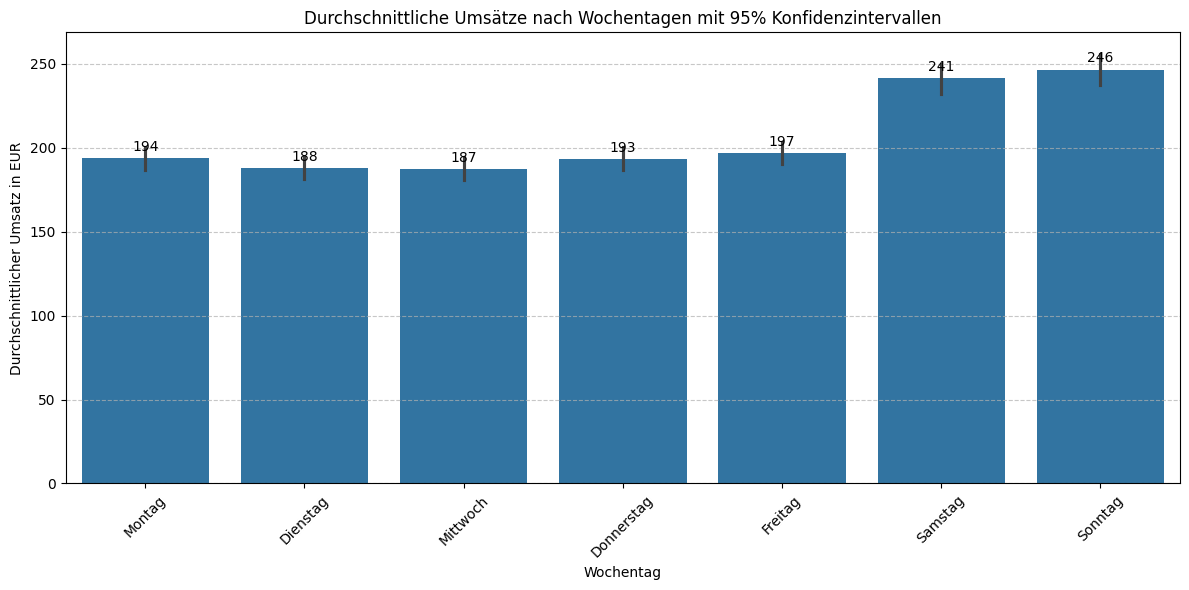

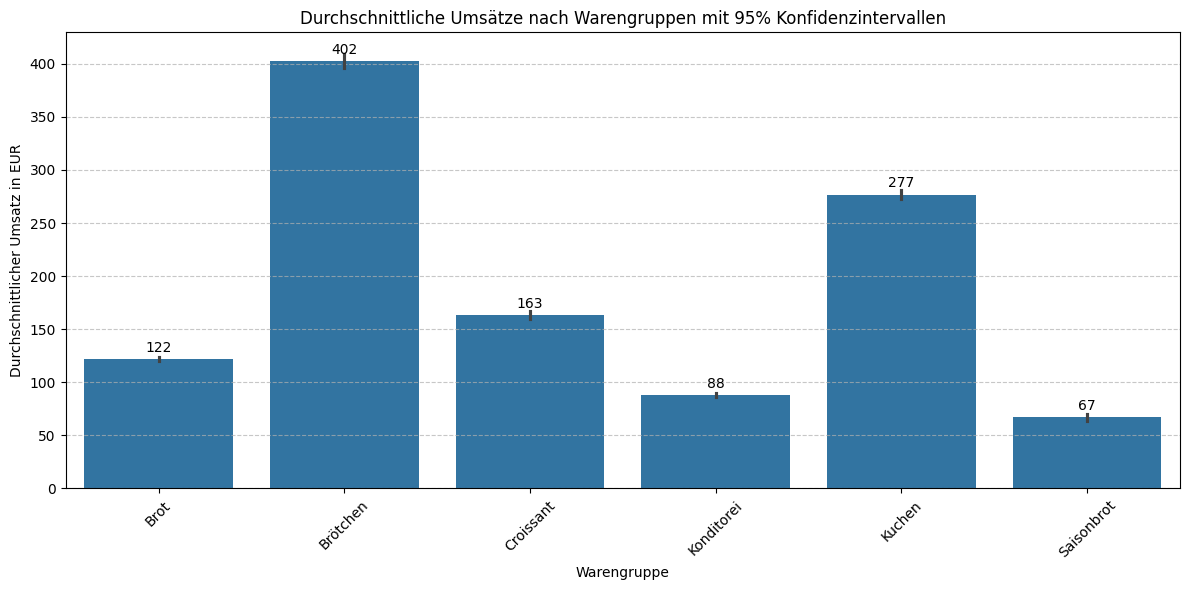

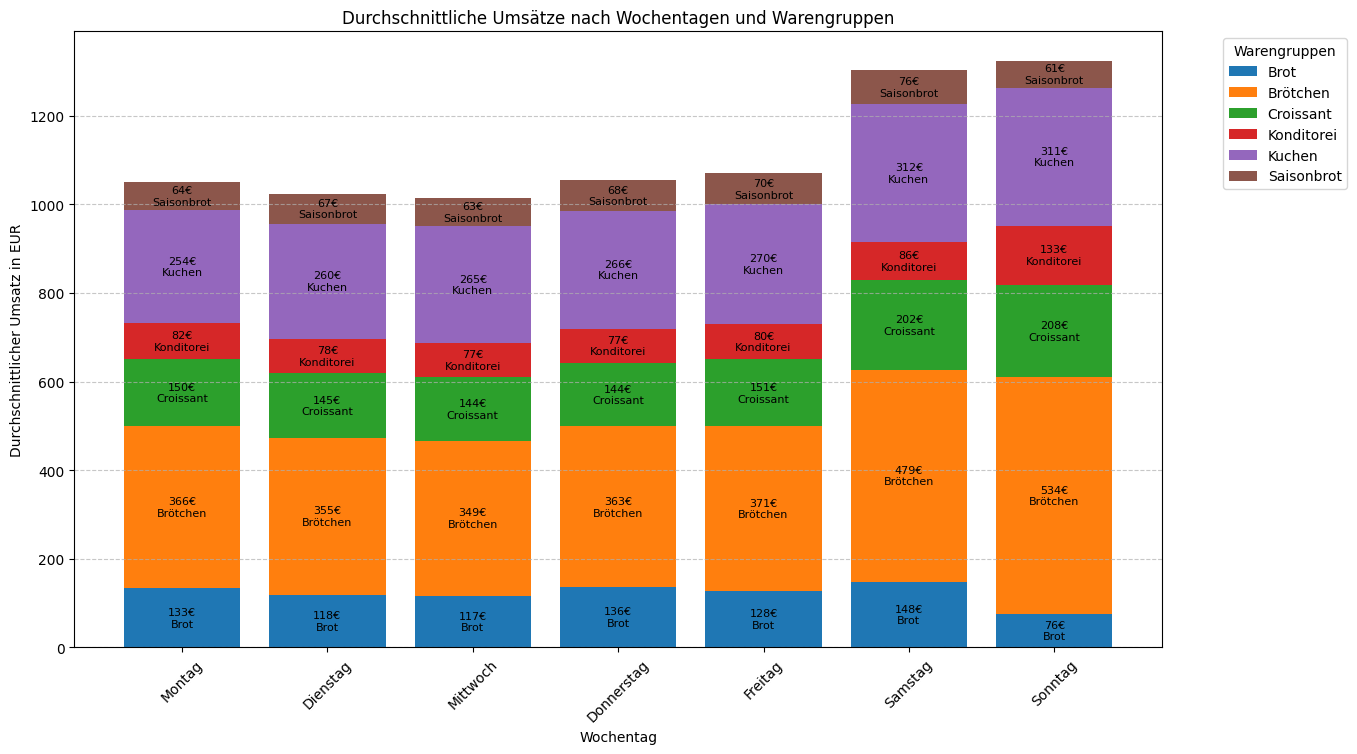

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Warengruppen-Mapping und Config definieren
warengruppen_config = {
    1: {'name': 'Brot', 'color': '#1f77b4'},
    2: {'name': 'Brötchen', 'color': '#ff7f0e'},
    3: {'name': 'Croissant', 'color': '#2ca02c'},
    4: {'name': 'Konditorei', 'color': '#d62728'},
    5: {'name': 'Kuchen', 'color': '#9467bd'},
    6: {'name': 'Saisonbrot', 'color': '#8c564b'}
}

warengruppen_mapping = {k: v['name'] for k, v in warengruppen_config.items()}

def load_and_prepare_data(file_path):
    """
    Lädt und bereitet die Umsatzdaten vor
    """
    # Daten einlesen
    df = pd.read_csv(file_path)
    
    # Datum in datetime konvertieren
    df['Datum'] = pd.to_datetime(df['Datum'])
    
    # Wochentag extrahieren und übersetzen
    df['Wochentag'] = df['Datum'].dt.day_name()
    
    # Wochentage auf Deutsch übersetzen
    wochentage_mapping = {
        'Monday': 'Montag',
        'Tuesday': 'Dienstag',
        'Wednesday': 'Mittwoch',
        'Thursday': 'Donnerstag',
        'Friday': 'Freitag',
        'Saturday': 'Samstag',
        'Sunday': 'Sonntag'
    }
    df['Wochentag'] = df['Wochentag'].map(wochentage_mapping)
    
    # Warengruppen-Namen hinzufügen
    df['Warengruppe_Name'] = df['Warengruppe'].map(warengruppen_mapping)
    
    return df

def analyze_sales_by_category(df):
    """
    Analysiert Umsatzdaten nach Warengruppen und Wochentagen
    """
    # Gesamtstatistiken pro Warengruppe
    gesamt_stats = df.groupby('Warengruppe_Name').agg({
        'Umsatz': ['sum', 'mean', 'count']
    }).round(2)
    
    # Durchschnittlicher Umsatz pro Wochentag und Warengruppe
    wochentag_avg = df.pivot_table(
        values='Umsatz',
        index='Warengruppe_Name',
        columns='Wochentag',
        aggfunc='mean'
    ).round(2)
    
    return gesamt_stats, wochentag_avg

def plot_daily_sales(df):
    """
    Erstellt ein Balkendiagramm der durchschnittlichen Umsätze nach Wochentagen
    """
    wochentage_reihenfolge = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']
    
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df, 
                    x='Wochentag', 
                    y='Umsatz', 
                    order=wochentage_reihenfolge,
                    ci=95)

    # Durchschnittswerte über den Balken anzeigen
    for i in ax.containers:
        ax.bar_label(i, fmt='%.0f', padding=3)

    plt.title('Durchschnittliche Umsätze nach Wochentagen mit 95% Konfidenzintervallen')
    plt.xlabel('Wochentag')
    plt.ylabel('Durchschnittlicher Umsatz in EUR')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

def plot_category_sales(df):
    """
    Erstellt ein Balkendiagramm der durchschnittlichen Umsätze nach Warengruppen
    """
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df, 
                    x='Warengruppe_Name', 
                    y='Umsatz',
                    ci=95)

    for i in ax.containers:
        ax.bar_label(i, fmt='%.0f', padding=3)

    plt.title('Durchschnittliche Umsätze nach Warengruppen mit 95% Konfidenzintervallen')
    plt.xlabel('Warengruppe')
    plt.ylabel('Durchschnittlicher Umsatz in EUR')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

def plot_combined_sales(df):
    """
    Erstellt ein gestapeltes Balkendiagramm der durchschnittlichen Umsätze 
    nach Wochentagen und Warengruppen
    """
    # Wochentage in richtige Reihenfolge bringen
    wochentage_reihenfolge = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']
    
    # Durchschnittliche Umsätze pro Wochentag und Warengruppe berechnen
    pivot_data = df.pivot_table(
        values='Umsatz',
        index='Wochentag',
        columns='Warengruppe_Name',
        aggfunc='mean'
    ).reindex(wochentage_reihenfolge)
    
    # Figure und Axes erstellen mit extra Platz für Legende
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Basis für gestapelte Balken
    bottom = np.zeros(len(wochentage_reihenfolge))
    
    # Balken für jede Warengruppe zeichnen
    bars = []
    labels = []
    
    # X-Positionen für die Balken
    x = np.arange(len(wochentage_reihenfolge))
    
    for warengruppe_id, config in warengruppen_config.items():
        warengruppe_name = config['name']
        color = config['color']
        
        # Daten für diese Warengruppe
        data = pivot_data[warengruppe_name].values
        
        # Balken zeichnen
        bar = ax.bar(x, 
                    data, 
                    bottom=bottom, 
                    label=warengruppe_name, 
                    color=color)
        
        # Werte in den Balken anzeigen
        for idx, rect in enumerate(bar):
            height = rect.get_height()
            middle_y = bottom[idx] + height/2
            ax.text(rect.get_x() + rect.get_width()/2., middle_y,
                   f'{data[idx]:.0f}€\n{warengruppe_name}',
                   ha='center',
                   va='center',
                   fontsize=8)
        
        bottom += data
        bars.append(bar)
        labels.append(warengruppe_name)
    
    # Plot formatieren
    ax.set_title('Durchschnittliche Umsätze nach Wochentagen und Warengruppen')
    ax.set_xlabel('Wochentag')
    ax.set_ylabel('Durchschnittlicher Umsatz in EUR')
    ax.set_xticks(x)
    ax.set_xticklabels(wochentage_reihenfolge, rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Legende außerhalb des Plots platzieren
    ax.legend(bars, labels, 
             title='Warengruppen', 
             bbox_to_anchor=(1.05, 1), 
             loc='upper left')
    
    # Layout anpassen mit extra Platz für Legende
    plt.subplots_adjust(right=0.85)
    
    return fig

def print_analysis(gesamt_stats, wochentag_avg):
    """
    Gibt die Analyseergebnisse formatiert aus
    """
    print("\nGesamtstatistiken pro Warengruppe:")
    print("===================================")
    print(gesamt_stats)
    
    print("\nDurchschnittlicher Umsatz pro Wochentag und Warengruppe:")
    print("======================================================")
    print(wochentag_avg)
    
    print("\nBester Verkaufstag pro Warengruppe:")
    print("==================================")
    for warengruppe in wochentag_avg.index:
        bester_tag = wochentag_avg.loc[warengruppe].idxmax()
        bester_umsatz = wochentag_avg.loc[warengruppe].max()
        print(f"{warengruppe}: {bester_tag} (Ø {bester_umsatz:.2f} €)")

def main():
    # Matplotlib Backend für Inline-Plots setzen
    plt.close('all')
    
    # Daten laden und vorbereiten
    df = load_and_prepare_data('umsatzdaten_gekuerzt.csv')
    
    # Analysen durchführen
    gesamt_stats, wochentag_avg = analyze_sales_by_category(df)
    
    # Ergebnisse ausgeben
    print_analysis(gesamt_stats, wochentag_avg)
    
    # Visualisierungen erstellen
    plot_daily_sales(df)
    plot_category_sales(df)
    fig = plot_combined_sales(df)
    
    plt.show()

if __name__ == "__main__":
    main()